# SIT225: Week 8 Activity 1

In [76]:
# Fill in student ID and name
student_id = "s214527809"
student_first_last_name = "Paul Dal Pozzo"
print(student_id, student_first_last_name)

s214527809 Paul Dal Pozzo


### Imports

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime

### Load Data

In [78]:
# CSV file names
X_CSV: str = 'Pixel 7 Pro Thing-Accelerometer_X.csv'
Y_CSV: str = 'Pixel 7 Pro Thing-Accelerometer_Y.csv'
Z_CSV: str = 'Pixel 7 Pro Thing-Accelerometer_Z.csv'
LINEAR_CSV: str = 'Pixel 7 Pro Thing-Accelerometer_Linear.csv'

In [79]:
# read csv file with pandas
x_axis_df = pd.read_csv(X_CSV)
y_axis_df = pd.read_csv(Y_CSV)
z_axis_df = pd.read_csv(Z_CSV)
linear_df = pd.read_csv(LINEAR_CSV)

### Functions

convertToTime - converts the time stamp from csv to Hours:Minutes:Seconds

convertToTicks - converts the time stamp result from convertToTime() to Hours:Minutes

In [80]:
# change the time stamp in the data frame to make it more readable
def convertToTime(timeStamp: str) -> str:
    # split time stamp at '.' so we can ignore microseconds and beyond
    tsSplit: list[str] = timeStamp.split('.')
    # split time stamp again at 'T' so we can have date and time respectively
    tsSplit: list[str] = tsSplit[0].split('T')
    return tsSplit[1]

In [81]:
# change the time stamp in the data frame to make it more readable on the graphs by removing the seconds
def convertToTicks(timeStamp: str) -> str:
    date_time: datetime = datetime.strptime(timeStamp, "%H:%M:%S")
    # convert timestamp to string in HH:MM:SS
    str_date_time: str = date_time.strftime("%H:%M")
    return str_date_time

### Create Time Stamp lists

timeList - %H:%M:%S - used to present data on the graphs

tickList - %H:%M:%S - used to create ticks on the graphs (length is shorter than timeList)

tickShow - %H:%M - used to label ticks on the graphs (length matches tickList but changes the string to be more readable)

In [82]:
# create a list of timestamps from x_axis_df time column
timestrList = x_axis_df['time'].tolist()
# new list of timestamps that will hold a string of the hour:minute:seconds data
timeList: list[str] = []

# iterate over timestamps to make them readable 
i = 0
while i < len(timestrList):
    timeList.append(convertToTime(timestrList[i]))
    i += 1

In [83]:
# print out lengths to confirm it was done correctly
print(len(timestrList), len(timeList))
print(timeList)

629 629
['00:22:48', '00:22:50', '00:22:51', '00:22:52', '00:22:53', '00:22:54', '00:22:55', '00:22:56', '00:22:57', '00:22:58', '00:22:59', '00:23:00', '00:23:01', '00:23:02', '00:23:03', '00:23:04', '00:23:05', '00:23:06', '00:23:07', '00:23:08', '00:23:09', '00:23:10', '00:23:11', '00:23:12', '00:23:13', '00:23:14', '00:23:15', '00:23:16', '00:23:17', '00:23:18', '00:23:19', '00:23:20', '00:23:21', '00:23:22', '00:23:23', '00:23:24', '00:23:25', '00:23:26', '00:23:27', '00:23:28', '00:23:29', '00:23:30', '00:23:31', '00:23:32', '00:23:33', '00:23:34', '00:23:35', '00:23:36', '00:23:37', '00:23:38', '00:23:39', '00:23:40', '00:23:41', '00:23:42', '00:23:43', '00:23:44', '00:23:45', '00:23:46', '00:23:47', '00:23:48', '00:23:49', '00:23:50', '00:23:51', '00:23:52', '00:23:54', '00:23:55', '00:23:56', '00:23:56', '00:23:57', '00:23:58', '00:23:59', '00:24:00', '00:24:01', '00:24:02', '00:24:03', '00:24:04', '00:24:05', '00:24:06', '00:24:07', '00:24:08', '00:24:09', '00:24:10', '00:24:

In [84]:
# create a list for the time value ticks for the graph
tickList = []
# 629 / 10 will give the interval for 10 ticks
intervals: int = math.floor(len(timeList)/10)

# starting at time at index 4
i = 4
while i < len(timeList):
    tickList.append(timeList[i])
    i += intervals

print(len(tickList), tickList)

11 ['00:22:53', '00:23:56', '00:24:57', '00:25:59', '00:27:02', '00:28:37', '00:29:39', '00:30:41', '00:31:43', '00:32:47', '00:33:49']


In [85]:
# create a list to label the time value ticks for the graph
tickShow = []

i = 0
while i < len(tickList):
    tickShow.append(convertToTicks(tickList[i]))
    i += 1

print(len(tickShow), tickShow)

11 ['00:22', '00:23', '00:24', '00:25', '00:27', '00:28', '00:29', '00:30', '00:31', '00:32', '00:33']


### Create Graphs

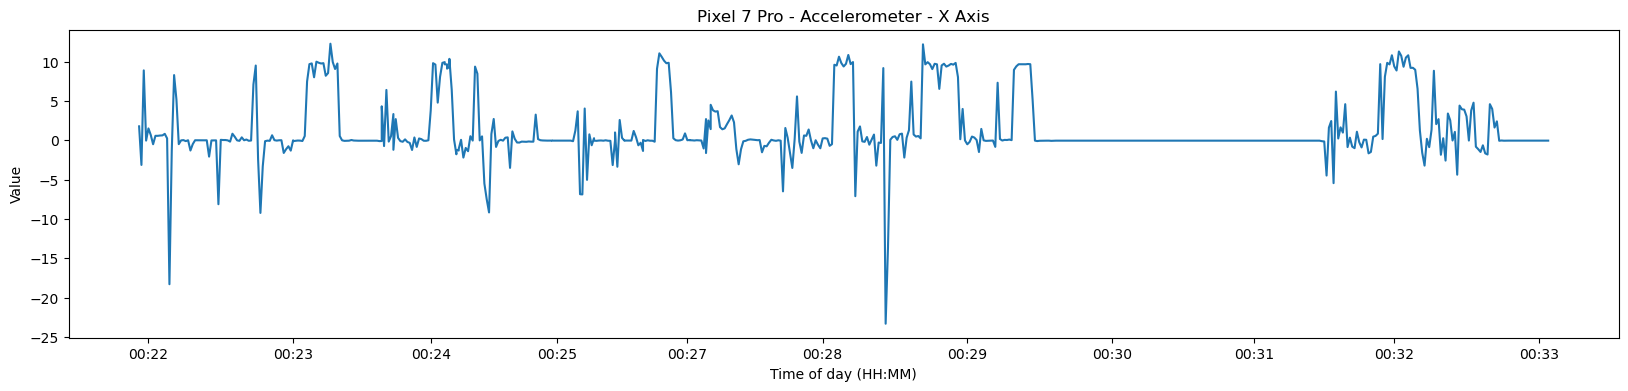

In [86]:
fig, ax1 = plt.subplots()

plt.title("Pixel 7 Pro - Accelerometer - X Axis")

color = 'tab:blue'
ax1.set_xlabel('Time of day (HH:MM)')
ax1.set_ylabel('Value')
ax1.plot(timeList, x_axis_df['value'], color=color, label='X Axis')

fig.set_figwidth(20)
fig.set_figheight(4)

plt.xticks(tickList, tickShow)
plt.show()

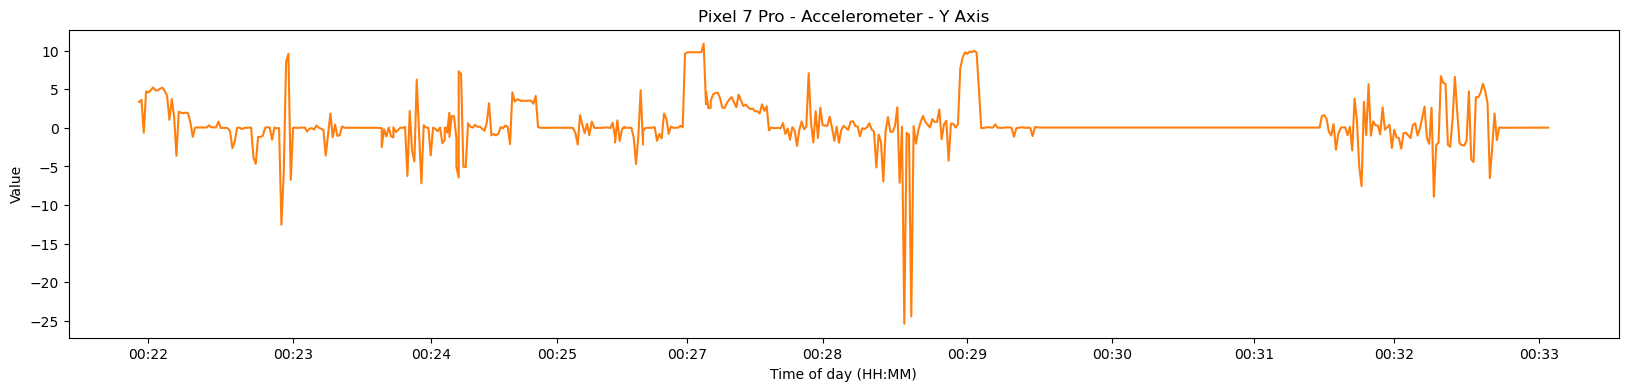

In [87]:
fig, ax1 = plt.subplots()

plt.title("Pixel 7 Pro - Accelerometer - Y Axis")

ax1.set_xlabel('Time of day (HH:MM)')
ax1.set_ylabel('Value')
color = 'tab:orange'
ax1.plot(timeList, y_axis_df['value'], color=color, label='Y Axis')

fig.set_figwidth(20)
fig.set_figheight(4)

plt.xticks(tickList, tickShow)
plt.show()

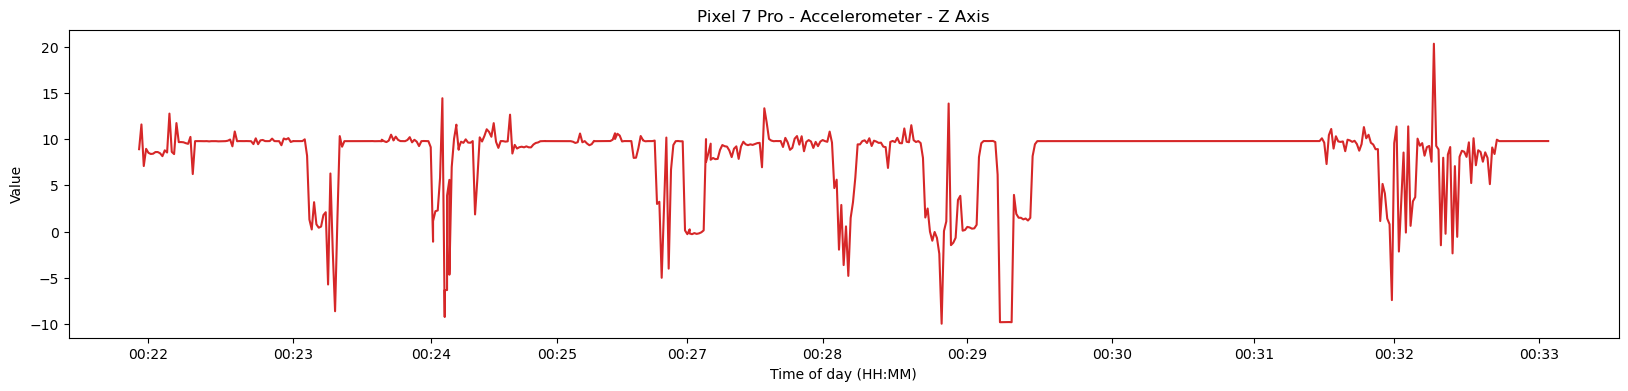

In [88]:
fig, ax1 = plt.subplots()

plt.title("Pixel 7 Pro - Accelerometer - Z Axis")

ax1.set_xlabel('Time of day (HH:MM)')
ax1.set_ylabel('Value')
color = 'tab:red'
ax1.plot(timeList, z_axis_df['value'], color=color, label='Z Axis')

fig.set_figwidth(20)
fig.set_figheight(4)

plt.xticks(tickList, tickShow)
plt.show()

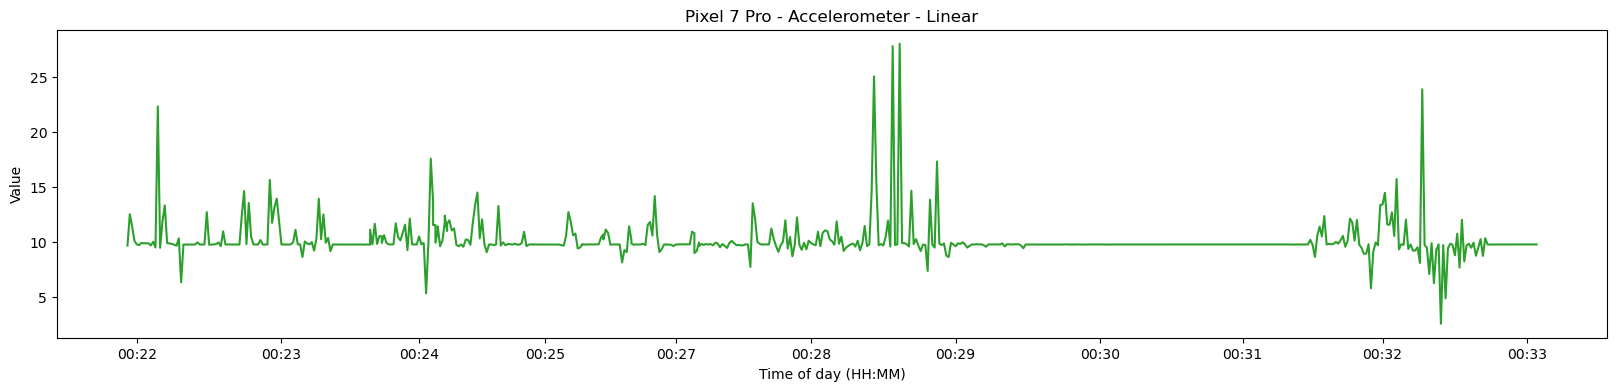

In [89]:
fig, ax1 = plt.subplots()

plt.title("Pixel 7 Pro - Accelerometer - Linear")

ax1.set_xlabel('Time of day (HH:MM)')
ax1.set_ylabel('Value')
color = 'tab:green'
ax1.plot(timeList, linear_df['value'], color=color, label='Linear')

fig.set_figwidth(20)
fig.set_figheight(4)

plt.xticks(tickList, tickShow)
plt.show()

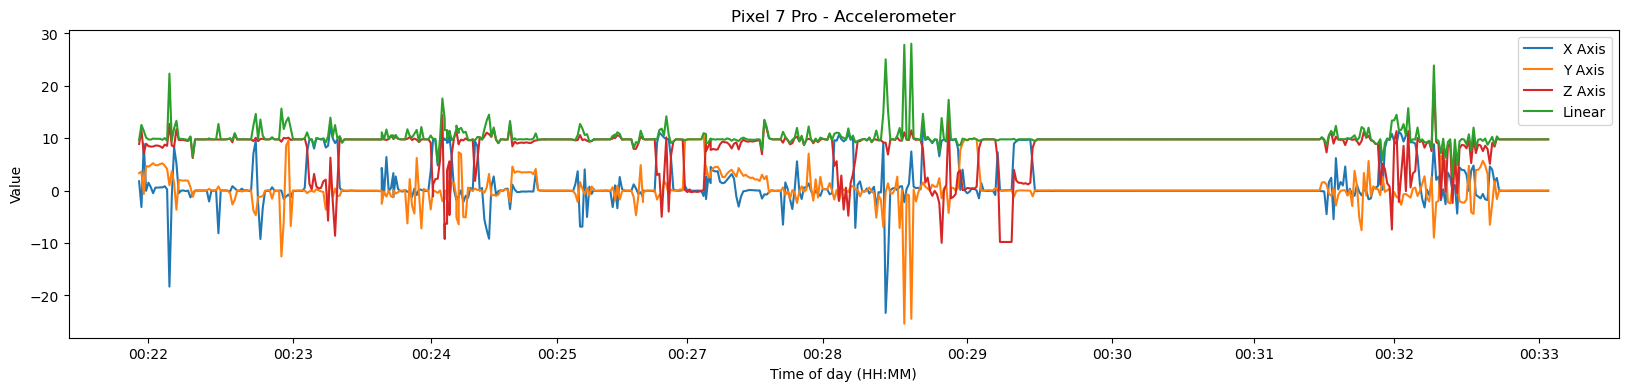

In [90]:
fig, ax1 = plt.subplots()

plt.title("Pixel 7 Pro - Accelerometer")

color = 'tab:blue'
ax1.set_xlabel('Time of day (HH:MM)')
ax1.set_ylabel('Value')
ax1.plot(timeList, x_axis_df['value'], color=color, label='X Axis')

color = 'tab:orange'
ax1.plot(timeList, y_axis_df['value'], color=color, label='Y Axis')

color = 'tab:red'
ax1.plot(timeList, z_axis_df['value'], color=color, label='Z Axis')

color = 'tab:green'
ax1.plot(timeList, linear_df['value'], color=color, label='Linear')

fig.set_figwidth(20)
fig.set_figheight(4)

plt.xticks(tickList, tickShow)
plt.legend()
plt.show()